In [3]:
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import pandas as pd
from databaseconfig import pwd

In [4]:
#    pip install psycopg2-binary
engine = create_engine(('postgresql://postgres:{}@localhost:5432/bootcamp').format(pwd))


In [5]:
Base = automap_base()

In [6]:
Base.prepare(engine, reflect=True)

In [7]:
Base.classes.keys()

['employees', 'dept_emp', 'department', 'dept_manager', 'salaries', 'titles']

In [8]:
# same_sporder = session.query("SALARIES", "TITLES").filter("SALARIES.emp_no" == "TITLES.emp_no").limit(10).all()

conn = engine.connect()

[Text(0, 0, 'Assistant Engineer'),
 Text(0, 0, 'Engineer'),
 Text(0, 0, 'Manager'),
 Text(0, 0, 'Senior Engineer'),
 Text(0, 0, 'Senior Staff'),
 Text(0, 0, 'Staff'),
 Text(0, 0, 'Technique Leader')]

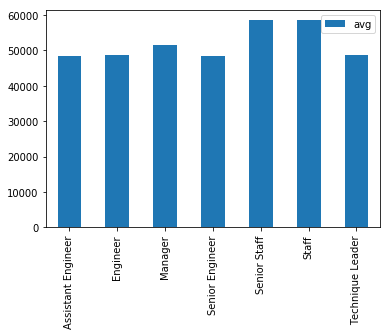

In [11]:
df = pd.read_sql("select avg(salary),title from salaries s, titles t where s.emp_no = t.emp_no group by title", conn)
# data
df.set_index(df.title)
ax=df.plot.bar()
ax.set_xticklabels(df.title, rotation=90)